In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.tsa import stattools

1. Оценить  En(ξ)  с помощью МСМС для графа 8х8.

In [21]:
a = np.zeros((8, 8), dtype = bool)

def step(x):
    y = x.copy()
    neighbor = []
    Axes1 = np.random.randint(8)
    Axes2 = np.random.randint(8)
    
    if (Axes1 == 0  and Axes2 == 0):
        neighbor += (x[Axes1, Axes2+1], x[Axes1+1, Axes2])
    elif (Axes1 == 7  and Axes2 == 0):
        neighbor += (x[Axes1-1, Axes2], x[Axes1, Axes2+1])
    elif (Axes1 == 0  and Axes2 == 7):
        neighbor += (x[Axes1, Axes2-1], x[Axes1+1, Axes2])
    elif (Axes1 == 7  and Axes2 == 7):
        neighbor += (x[Axes1, Axes2-1], x[Axes1-1, Axes2])
    elif (Axes1 == 0 and 0 < Axes2 < 7):
        neighbor += (x[Axes1+1, Axes2], x[Axes1, Axes2-1], x[Axes1, Axes2+1])
    elif (Axes1 == 7 and 0 < Axes2 < 7):
        neighbor += (x[Axes1-1, Axes2], x[Axes1, Axes2-1], x[Axes1, Axes2+1])
    elif (Axes2 == 0 and 0 < Axes1 < 7):
        neighbor += (x[Axes2+1, Axes1], x[Axes2, Axes1-1], x[Axes2, Axes1+1])
    elif (Axes2 == 7 and 0 < Axes1 < 7):
        neighbor += (x[Axes2-1, Axes1], x[Axes2, Axes1-1], x[Axes2, Axes1+1])
    else:
        neighbor += (x[Axes1-1, Axes2], x[Axes1, Axes2-1], x[Axes1, Axes2+1], x[Axes1+1, Axes2])
    step = 0
    for j in neighbor:
        step += j
    if (step > 0):
        y[Axes1, Axes2] = False
    else:
        y[Axes1, Axes2] = bool(np.random.randint(2))
    return y

def Markov_chain(x, ch = 400000, n = 200):
    Sum = []
    curr = x
    Res_ = []
    for i in range(ch):
        Res_.append(curr)
        Sum.append(np.sum(np.array(curr)))
        curr = step(curr)
    
    return Res_[n:], np.array(Sum[n:]), Sum

result, S, Sum1 = Markov_chain(a)
print("Математическое ожидание числа закрашенных вершин в конфигурации ξ - En(ξ) = ", S.mean())

Математическое ожидание числа закрашенных вершин в конфигурации ξ - En(ξ) =  15.239184592296148


2. Обосновать численно и графически стационарность.

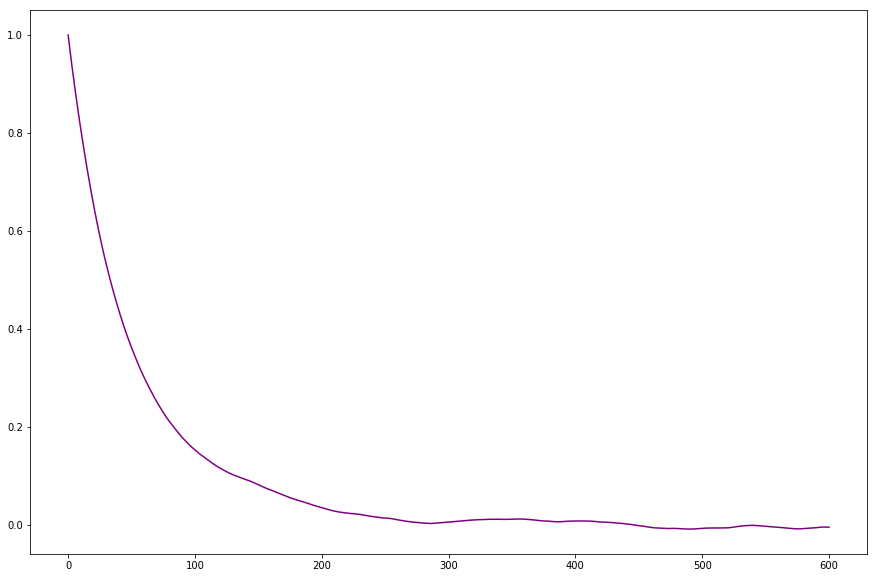

Min corr = 0.0001263979415594323
Step = 445


In [33]:
autocorr = stattools.acf(Sum1, fft = False, nlags = 600)
MIN = np.argmin(abs(autocorr))
plt.figure(figsize = (15, 10))
plt.plot(autocorr, color = 'purple')
plt.show()

print("Min corr =", autocorr[MIN])
print("Step =", MIN)

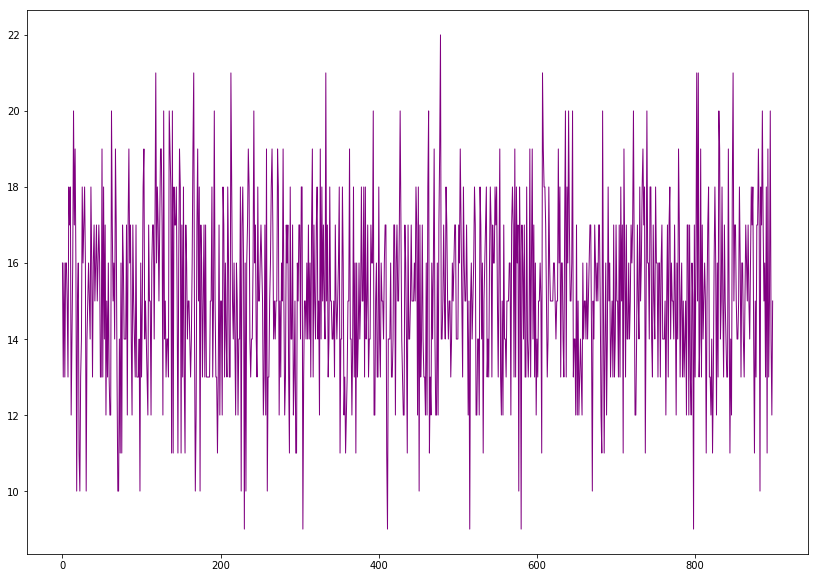

In [31]:
plt.figure(figsize = (13, 9))
S_1 = S[::MIN]
plt.plot(S_1, lw = 1, color = 'purple')
plt.show()

3. Построить график распределеиня  n(ξ)

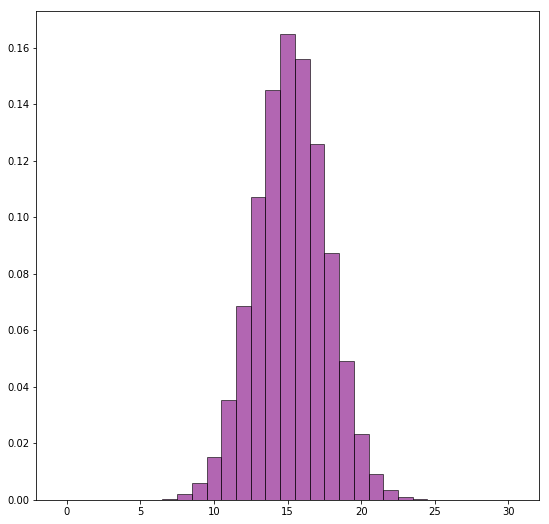

In [69]:
plt.figure(figsize = (9, 9))
plt.hist(S, bins = np.arange(32) - 0.5, density=True, alpha = 0.6, label = 'распределеиня n(ξ)', color = 'purple', edgecolor = 'black')
plt.show()

4. Изобразить раскраску для одного из случайных графов, взятых из стационарного распределения.

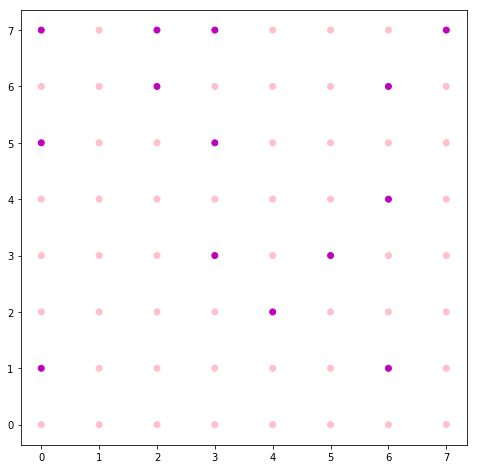

In [68]:
def coloring(Array):
    colors = np.empty(Array.shape, dtype='U5')
    colors[:] = 'pink'
    colors[Array] = 'm'
    x, y = np.indices((Array.shape))
    plt.figure(figsize = (8, 8))
    plt.scatter(x, y, c = colors.ravel())
    plt.show()

coloring(result[-1])